################################################################################

**Author**: _Pradip Kumar Das_

**License:** https://github.com/PradipKumarDas/Competitions/blob/main/LICENSE

**Profile & Contact:** [LinkedIn](https://www.linkedin.com/in/daspradipkumar/) | [GitHub](https://github.com/PradipKumarDas) | [Kaggle](https://www.kaggle.com/pradipkumardas) | pradipkumardas@hotmail.com (Email)

################################################################################

# Tabular Playground Series - Sep 2021

#### Aug 16, 2021 to Aug 30, 2021

#### https://www.kaggle.com/c/tabular-playground-series-sep-2021/

#### _**Predicting whether a claim will be made on an insurance policy**_

**Sections:**

* Dependencies
* Exploratory Data Analysis (EDA) & Preprocessing
* Modeling & Evaluation
* Submission

## Dependencies

In [1]:
# Loads required packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
"""from sklearn.metrics import mean_squared_error, r2_score, \
     mean_absolute_error, log_loss, average_precision_score, \
     f1_score, mean_absolute_percentage_error, ndcg_score"""

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
import xgboost as xgb

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

#from flaml import AutoML  # Microsoft FLAML couldn't be tried out due to dependency concerns found in Kaggle environment

import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA) & Preprocessing

In [2]:
# Loads data sets
train = pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
submission = pd.read_csv(
    "../input/tabular-playground-series-sep-2021/sample_solution.csv")

In [3]:
# Checks how the train data set looks
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(train)

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.108590,0.004314,-37.566,0.017364,0.289150,-10.25100,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,1938.3000,8.6331,4.060700,26.8670,-1.18000,10961.00,1.5397,135.3200,-1.496500,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.750500,18509.0,146820.0,-0.000276,1.090600e+16,1705.400,414.29,3.5392,1888.00,0.968930,18.3880,-0.001583,7.7059,5.9325,0.025693,4.5604,0.61122,10.7950,0.341930,0.235010,NaN,5237.7000,1.296100,163.66,0.403780,0.188600,-0.001446,-0.354160,6.6432,0.30534,0.514020,1.907300e+09,29.8610,0.965010,1797.20,72.1780,108.6200,1.9799,1.2907,0.995190,1.3228,827.340,7.779900e+14,4.129900e+10,0.006994,6.9835,43956.000,1978.20,5.50840,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000,5.022400e+10,53.39800,-2.2012,6871.00,3.8862,-0.005580,5252.100,166.6900,1.607400,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.4710,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.110930,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.10,1.01770,1
1,1,0.100900,0.299610,11822.000,0.276500,0.459700,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.2840,6.1872,1.041900,4.6404,31.87700,123620.00,1.3951,125.8100,1.198900,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.503300,238000.0,21440.0,-0.001344,3.079400e+16,229.100,844.82,1.4680,4726.50,0.915380,-1.5321,0.982600,7.1112,2.0797,0.042321,4.2523,0.41871,5.4499,0.012737,0.386470,7.3082,283.2100,-0.925520,140.80,0.247390,-0.001656,-0.000975,-0.226290,2.4246,0.77147,0.011613,1.803700e+09,64.6040,0.262650,4455.00,78.3390,745.5100,2.9069,1.4826,1.005100,1.4974,84.446,3.505600e+15,2.242300e+09,0.896300,4.6749,17713.000,9003.10,-4.35460,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600,2.300600e+10,44.05100,205.6900,4295.30,13.3880,0.468430,754.610,83.2330,1.189000,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.7200,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.976730,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.00,0.28359,0
2,2,0.178030,-0.006980,907.270,0.272140,0.459480,0.17327,2298.00,360650.0,1.224500e+13,15827.000,0.38164,1.230300e+09,0.25807,2.455600,NaN,26.8730,7.5463,1.996700,1.9526,817.76000,-2948.70,2.0054,1.6826,1.196800,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.131800,27940.0,862460.0,-0.002207,5.849100e+13,-897.840,NaN,1.3561,3063.40,0.086232,16.1060,0.001481,11.4760,5.3430,0.012162,4.1018,-0.88270,8.1228,-0.676690,0.337700,-1.0732,4097.0000,13.458000,159.24,0.322300,0.560090,0.000455,-0.160830,3.5753,0.60970,0.028301,5.271300e+08,14.4540,0.115490,14605.00,36.9920,-9.6391,64.2670,NaN,0.992780,2.5891,430.400,-4.453500e+13,5.144900e+12,0.099591,6.5516,1887.500,43319.00,4.39310,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845,1.306200e+09,2.37310,391.3700,2965.30,NaN,0.494590,43.524,138.5200,1.107900,0.91948,47.915,NaN,1.510500e+12,3.4663,0.560950,4.13090,95531.0,39.4860,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.201020,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.20,0.40690,1
3,3,0.152360,0.007259,780.100,0.025179,0.519470,7.49140,112.51,259490.0,7.781400e+13,-36.837,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.8400,7.8490,1.037900,8.0030,12.34900,-195.28,2.5598,92.1420,0.637890,1054.900,-1.204100e+10,5.187300e+12,1475400.0,1.036500,1.1903,0.989410,301200.0,NaN,-0.000007,-9.299200e+13,-10.818,1020.30,2.9553,3342.50,-0.0003

In [13]:
# Checks data types for all variables
train.dtypes

id         int64
f1       float64
f2       float64
f3       float64
f4       float64
          ...   
f115     float64
f116     float64
f117     float64
f118     float64
claim      int64
Length: 120, dtype: object

In [14]:
# Checks for data types used in the data set
train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

f1         AxesSubplot(0.125,0.826831;0.065678x0.053169)
f2      AxesSubplot(0.203814,0.826831;0.065678x0.053169)
f3      AxesSubplot(0.282627,0.826831;0.065678x0.053169)
f4      AxesSubplot(0.361441,0.826831;0.065678x0.053169)
f5      AxesSubplot(0.440254,0.826831;0.065678x0.053169)
                              ...                       
f114       AxesSubplot(0.361441,0.125;0.065678x0.053169)
f115       AxesSubplot(0.440254,0.125;0.065678x0.053169)
f116       AxesSubplot(0.519068,0.125;0.065678x0.053169)
f117       AxesSubplot(0.597881,0.125;0.065678x0.053169)
f118       AxesSubplot(0.676695,0.125;0.065678x0.053169)
Length: 118, dtype: object

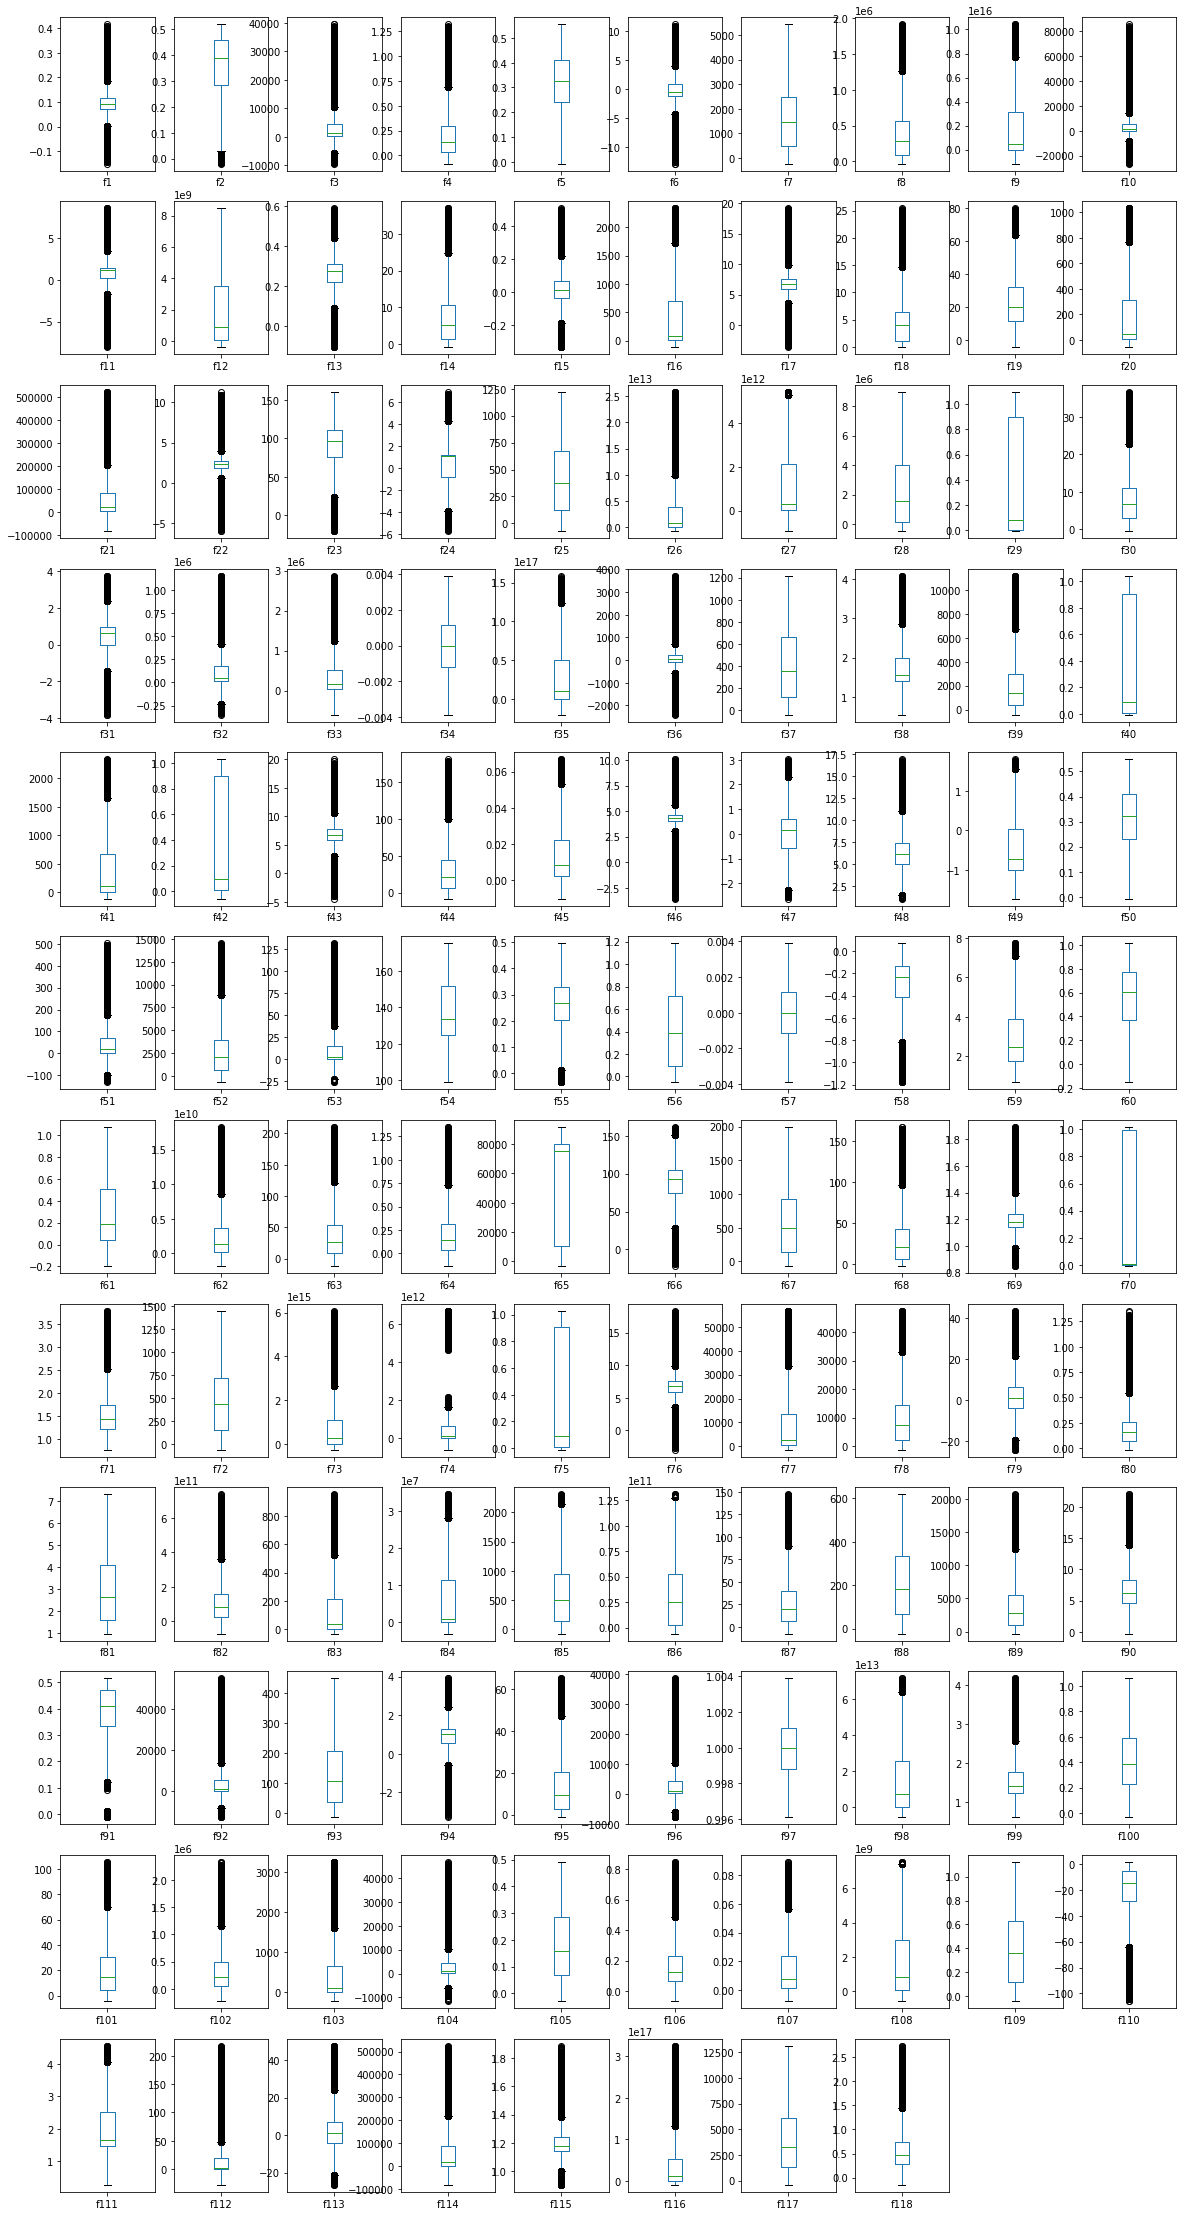

In [12]:
train.select_dtypes(exclude=["int"]).plot(
    kind='box', subplots=True, layout=(-1, 10), figsize=(20,40), legend=False, sharex=False, sharey=False)

In [16]:
with pd.option_context('display.max_columns', None): 
    display(train.select_dtypes(exclude=["int"]).describe())

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
count,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,942696.000000,942494.000000,9.423260e+05,942455.000000,942697.000000,942410.000000,942475.000000,942492.000000,942594.000000,942445.000000,942464.000000,942465.000000,942641.000000,942563.000000,942289.000000,942413.000000,9.425610e+05,9.424750e+05,9.426540e+05,942504.000000,942527.000000,942241.000000,9.423900e+05,9.424270e+05,942671.000000,9.425850e+05,942556.000000,942607.000000,942485.000000,942360.000000,942551.000000,942523.000000,942503.000000,942464.000000,942456.000000,942436.000000,942286.000000,942396.000000,942473.000000,942539.000000,942357.000000,942487.000000,942604.000000,942457.000000,942494.000000,942497.000000,942452.000000,942346.000000,942464.000000,942519.000000,942359.000000,942488.000000,9.424010e+05,942509.000000,942341.000000,942505.000000,942505.000000,942433.000000,942300.000000,942367.000000,942657.000000,942437.000000,942700.000000,9.423820e+05,9.423490e+05,942463.000000,942350.000000,942668.000000,942470.000000,942541.000000,942599.000000,942573.000000,9.424340e+05,942292.000000,9.425340e+05,942470.000000,9.423960e+05,942603.000000,942371.000000,942474.000000,942437.000000,942412.000000,942427.000000,942462.000000,942505.000000,942320.000000,942634.000000,942654.000000,9.426310e+05,942485.000000,942393.000000,942570.000000,9.427510e+05,942319.000000,942721.000000,942533.000000,942375.000000,942535.000000,9.425790e+05,942390.000000,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000
mean,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,5323.442367,0.729518,1.844436e+09,0.247759,6.999152,0.019394,444.804439,6.892520,4.491982,22.448660,203.782031,61070.567499,2.269597,87.166891,0.341240,414.983986,3.379988e+12,1.254164e+12,2.256887e+06,0.329054,7.882455,0.394211,1.344700e+05,3.579055e+05,-0.000005,2.782318e+16,185.485192,406.072571,1.768743,1981.074344,0.359381,446.664352,0.359571,6.946628,29.761954,0.013454,4.277615,0.029221,6.378937,-0.425397,0.299912,56.638828,2683.140670,12.204214,137.373234,0.250631,0.411071,0.000012,-0.329313,3.058053,0.548762,0.273404,2.469247e+09,36.836014,0.212860,47835.926728,84.103569,608.154443,29.001846,1.212457,0.418355,1.544838,482.147786,7.964640e+14,1.063963e+12,0.376600,6.876209,10721.517913,10525.861146,1.555219,0.194237,3.240370,1.053811e+11,152.850973,6.128694e+06,635.301741,3.251414e+10,26.598567,207.260994,3805.100719,6.733556,0.366754,4868.608259,132.264261,0.821190,13.120677,3849.687894,0.999970,1.415684e+13,1.683151,0.425840,20.213776,3.215760e+05,548.647493,3855.616303,0.178027,0.160832,0.014196,1.671873e+09,0.398622,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267
std,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,10068.380032,1.495535,2.125478e+09,0.101156,6.621472,0.101880,631.327086,1.715735,3.899241,14.609968,281.015052,89859.616863,0.896001,37.350264,1.643595,314.822410,5.655524e+12,1.642736e+12,2.303909e+06,0.433861,5.939864,0.781932,2.036605e+05,4.626670e+05,0.001534,3.452707e+16,701.769083,314.708639,0.588984,1958.688237,0.441752,620.581881,0.407419,1.831970,28.776654,0.014658,1.139983,0.676841,2.107511,0.729078,0.146104,88.181507,2525.289159,21.651584,16.041827,0.110021,0.323768,0.001520,0.281456,1.734140,0.268437,0.256322,2.903456e+09

In [18]:
# Checks distribution of categorical target variable
train.claim.value_counts()

0    480404
1    477515
Name: claim, dtype: int64

In [19]:
# Counts missing values in each columns
missing_value_counts = train.isna().sum()
print(missing_value_counts)

id           0
f1       15247
f2       15190
f3       15491
f4       15560
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 120, dtype: int64


In [20]:
# Shows columns contain missing values
missing_value_counts = missing_value_counts[missing_value_counts>0]
print(missing_value_counts)

f1      15247
f2      15190
f3      15491
f4      15560
f5      15405
        ...  
f114    15438
f115    15559
f116    15589
f117    15407
f118    15212
Length: 118, dtype: int64


<AxesSubplot:>

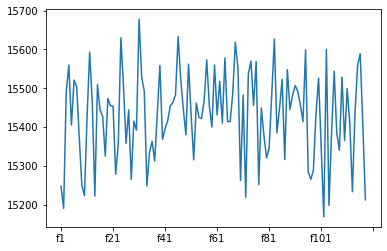

In [21]:
# Plots the missing value counts for all columns except those have no missing values e.g. 'id' and 'target'
missing_value_counts.plot()

In [22]:
del missing_value_counts

## Modeling & Evaluation

In [3]:
bins = pd.cut(train.claim, bins=2, labels=list(range(2)), ordered=True)
sk_fold = StratifiedKFold(n_splits=5)

In [32]:
# Seperates predictor variables from target

y = train.claim
X = train.drop(["id", "claim"], axis=1)
X_test = test.select_dtypes(exclude=["int"])

In [5]:
numeric_columns = train.select_dtypes("float").columns.tolist()

numeric_transformer = Pipeline(steps=[
    #("mean_imputation", SimpleImputer(strategy="mean", copy=False)),
    ("min-max_scaler", MinMaxScaler(copy=False))
])

preprocessor = ColumnTransformer(
    transformers=[("numeric_transformer", numeric_transformer, numeric_columns)])

In [15]:
cv_generator = sk_fold.split(X, bins)
model = XGBClassifier(
    n_estimators=100,
    objective='binary:logistic', 
    eval_metric='auc',
    tree_method='gpu_hist'
)
model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
cv_scores = cross_val_score(model_pipeline, X, y, scoring='roc_auc', cv=cv_generator, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   32.1s remaining:   21.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.2s finished


In [18]:
print("ROC AUC score of XGBoost (with default parameters) Model:", cv_scores.mean())

ROC AUC score of XGBoost (with default parameters) Model: 0.7997283427440998


In [19]:
del model_pipeline, model

**Automated Hyperparameter Tuning with Hyperopt**

In [6]:
cv_generator = sk_fold.split(X, bins)

for fold, (idx_train, idx_val) in enumerate(cv_generator):
    x_train = preprocessor.fit_transform(X.iloc[idx_train])
    y_train = y.iloc[idx_train]
    x_val = preprocessor.transform(X.iloc[idx_val])
    y_val = y.iloc[idx_val]
    break

In [7]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dval = xgb.DMatrix(data=x_val, label=y_val)

In [8]:
# Sets up a search space for XGBoost hyperparameters
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform("max_depth", 2, 6, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 8, 1),
    'reg_alpha' : hp.uniform('reg_alpha', 1e-8, 100),
    'reg_lambda' : hp.uniform('reg_lambda', 1e-8, 100),
    'gamma': hp.uniform ('gamma', 0.0, 1.0),
    'subsample': hp.uniform("subsample", 0.1, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0)
}

In [21]:
def trial_loss(space):
    """
    Trial function for Hyperopt to call by passing a set a trial hyperparamets
    to train model and perform predictions.
    
    Parameters:
    ----------
    space: A set a trial hyperparamets
    
    Returns metric for Hyperopt to estimate for further tuning in search space.
    """
    
    # Converts parameter value to int as required by XGBoost
    space["max_depth"] = int(space["max_depth"])
    space["objective"] = "binary:logistic"
    space["eval_metric"] = "auc"
    space["tree_method"] = "gpu_hist"
    
    model = xgb.train(
        space, 
        dtrain, 
        num_boost_round=2000, 
        evals=[(dtrain, 'train'), (dval, 'eval')],
        early_stopping_rounds=100, verbose_eval=False)
    
    predictions = model.predict(dval)
    
    roc_auc = roc_auc_score(y_val, predictions)
    
    # Flags variables to be deleted
    del predictions, model
    
    return {"loss": -roc_auc, "status": STATUS_OK}

In [23]:
# Starts hyperparameters tuning
trials = Trials()
best_trial = fmin(fn=trial_loss, space=space, algo=tpe.suggest, max_evals=200, trials=trials)

100%|██████████| 200/200 [57:53<00:00, 17.37s/trial, best loss: -0.8045556179638146] 


In [24]:
best_trial

{'colsample_bytree': 0.12859076646132783,
 'gamma': 0.9799671482071611,
 'learning_rate': 0.033141001731555604,
 'max_depth': 6.0,
 'min_child_weight': 7.0,
 'reg_alpha': 31.5244170145214,
 'reg_lambda': 80.8514843693154,
 'subsample': 0.9980697277906398}

## Submission

**Prepares final XGBoost model with optimized parameters**

In [30]:
best_trial["max_depth"] = int(best_trial["max_depth"])
best_trial["objective"] = "binary:logistic"
best_trial["eval_metric"] = "auc"
best_trial["tree_method"] = "gpu_hist"

In [36]:
test_predictions = []

cv_generator = sk_fold.split(X, bins)

for fold, (idx_train, idx_val) in enumerate(cv_generator):
    print("fold", fold)
    x_train = preprocessor.fit_transform(X.iloc[idx_train])
    y_train = y.iloc[idx_train]
    x_val = preprocessor.transform(X.iloc[idx_val])
    y_val = y.iloc[idx_val]
    
    dtrain = xgb.DMatrix(data=x_train, label=y_train)
    dval = xgb.DMatrix(data=x_val, label=y_val)
    dtest = xgb.DMatrix(data=preprocessor.transform(X_test))
    
    model = xgb.train(
        best_trial, 
        dtrain, 
        num_boost_round=2000, 
        evals=[(dtrain, 'train'), (dval, 'eval')],
        early_stopping_rounds=50, verbose_eval=100)
    
    predictions = model.predict(dtest)
    
    test_predictions.append(predictions)

fold 0
[0]	train-auc:0.54379	eval-auc:0.54356
[100]	train-auc:0.79547	eval-auc:0.79583
[200]	train-auc:0.79599	eval-auc:0.79602
[300]	train-auc:0.79680	eval-auc:0.79628
[400]	train-auc:0.79935	eval-auc:0.79816
[500]	train-auc:0.80183	eval-auc:0.79968
[600]	train-auc:0.80403	eval-auc:0.80125
[700]	train-auc:0.80581	eval-auc:0.80231
[800]	train-auc:0.80712	eval-auc:0.80295
[900]	train-auc:0.80832	eval-auc:0.80346
[1000]	train-auc:0.80942	eval-auc:0.80386
[1100]	train-auc:0.81037	eval-auc:0.80411
[1200]	train-auc:0.81131	eval-auc:0.80433
[1300]	train-auc:0.81215	eval-auc:0.80443
[1400]	train-auc:0.81297	eval-auc:0.80451
[1500]	train-auc:0.81376	eval-auc:0.80453
[1600]	train-auc:0.81455	eval-auc:0.80456
[1700]	train-auc:0.81529	eval-auc:0.80456
[1711]	train-auc:0.81538	eval-auc:0.80456
fold 1
[0]	train-auc:0.54413	eval-auc:0.54208
[100]	train-auc:0.79574	eval-auc:0.79450
[184]	train-auc:0.79623	eval-auc:0.79460
fold 2
[0]	train-auc:0.54378	eval-auc:0.54392
[100]	train-auc:0.79599	eval-auc:

In [41]:

# Sets target columns with predictions
submission["claim"] = np.mean(np.column_stack(test_predictions),axis=1)

# Checks for sumbission file before saving
submission

,id,claim
0,957919,0.427902
1,957920,0.334933
2,957921,0.446856
3,957922,0.339451
4,957923,0.352564
...,...,...
493469,1451388,0.552662
493470,1451389,0.338529
493471,1451390,0.756208
493472,1451391,0.352345


In [42]:
# Saves test predictions
submission.to_csv("./submission.csv", index=False)